# Preprocesamiento de los datos

## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler # Importación librería imbalanced-learn para balanceo de clases
from sklearn.preprocessing import OneHotEncoder

## Carga de datos 

Se cargan los datos como en el paso de exploración pero sin ninguna conversión para análisis. 

In [2]:
path = "survey lung cancer.csv" # Ruta del dataset 

archivo = pd.read_csv(path) # Importación de datos de la ruta
df = pd.DataFrame(archivo) # Convertir los datos a un pandas DataFrame

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Balanceo de clases por sobremuestreo (Oversampling) 

La etapa de exploración evidenció una variable objetivo desbalanceada, por lo que se equilibra a continuación:  

In [3]:
# Tomando a 'X' como las características y 'y' como variable objetivo
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

y.value_counts() # Variable objetivo sin balancear

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [4]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

y_resampled.value_counts() # variable objetivo balanceada

LUNG_CANCER
YES    270
NO     270
Name: count, dtype: int64

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


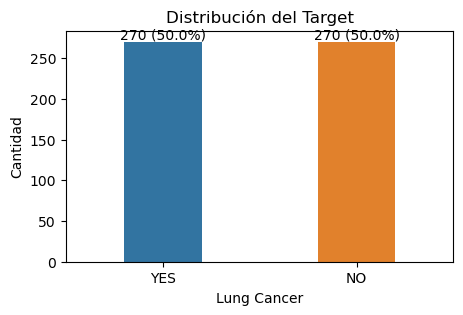

In [5]:
# Visualización de la proporción del target
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=y_resampled, data=df, width=0.4)

# Agregar etiquetas de frecuencias
total = len(y_resampled)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Distribución del Target')
plt.xlabel('Lung Cancer')
plt.ylabel('Cantidad')
plt.show()

In [6]:
# Consolidación del dataset balanceado 
df = X_resampled.join(y_resampled)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,F,60,2,1,1,1,1,2,1,1,1,1,2,1,1,NO
536,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
537,F,55,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
538,M,69,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


## Limpieza de datos

En primero lugar verificamos que no existan valores nulos o no válidos dentro del dataset. 

In [7]:
df.isnull().any()

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

Dado que el data set no cuenta con valores nulos o no válidos en el conjunto de datos no se realiza ningún tipo de tratamiento o imputación. 

## Codificación de datos

Para un mejor tratamiento de datos por parte del modelo de entrenamiento, se realiza la codificación del de las variables nominales a numéricas. Las características son 'GENDER' y la variable objetivo 'LUNG CANCER'. 

In [8]:
df.loc[:, "GENDER"] = df.loc[:, 'GENDER'].replace({'M':1, 'F':2})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
df.loc[:, 'LUNG_CANCER'] = df.loc[:, 'LUNG_CANCER'].replace({'NO':1, 'YES':2})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


### One Hot Encoder



In [11]:
categorical_features = df.drop(["AGE", "LUNG_CANCER"], axis=1).columns
categorical_features

df2 = df.copy()
ohe = OneHotEncoder(sparse=False)
ohe_cols = ohe.fit_transform(df2[categorical_features])

df2 = pd.DataFrame(ohe_cols, columns=ohe.get_feature_names_out(categorical_features))

df2 = df2.join(df["LUNG_CANCER"])

begin_cols = df2.iloc[:, :2]
end_cols = df2.iloc[:, 2:]

# Reconstruir df1 con columnas de inicio, luego D, luego final
df3 = begin_cols.join(df['AGE'])
df3 = df3.join(end_cols)

df3

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,GENDER_1,GENDER_2,AGE,SMOKING_1,SMOKING_2,YELLOW_FINGERS_1,YELLOW_FINGERS_2,ANXIETY_1,ANXIETY_2,PEER_PRESSURE_1,...,ALCOHOL CONSUMING_2,COUGHING_1,COUGHING_2,SHORTNESS OF BREATH_1,SHORTNESS OF BREATH_2,SWALLOWING DIFFICULTY_1,SWALLOWING DIFFICULTY_2,CHEST PAIN_1,CHEST PAIN_2,LUNG_CANCER
0,1.0,0.0,69,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2
1,1.0,0.0,74,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2
2,0.0,1.0,59,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,0.0,63,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
4,0.0,1.0,63,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.0,1.0,60,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
536,1.0,0.0,55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
537,0.0,1.0,55,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
538,1.0,0.0,69,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [14]:
# Exportar dataset preprocesado
df3.to_csv('lung_cancer_data_preprocessed.csv', index=False)